In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import array,random

In [26]:
df = pd.read_csv("/content/data_banknote_authentication.csv")
print("No. of Rows " + str(len(df)))
df.head(10)

No. of Rows 1372


,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Kurtosis of Wavelet Transformed image,Entropy of image,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


#### SPLITTING DATA INTO TRAIN AND TEST

In [27]:
train,test = train_test_split(df, test_size=0.2, random_state = 41)
N = len(train.columns) - 1
print(N)

4


In [0]:
dfs = np.split(train, np.arange(N, len(df.columns), N), axis=1)
x_train = dfs[0]
y_train = dfs[1]

dfp = np.split(test, np.arange(N, len(df.columns), N), axis=1)
x_test = dfp[0]
y_test = dfp[1]


In [29]:
epochs = 1500 
alpha = 0.01
weights = [1.00]     #weights[0]=bias 
dimensions =len(x_train.columns)
for i in range (1,dimensions+1):
  weights.append(random.random())
print("Initial weights are : " + str(weights))


Initial weights are : [1.0, 0.9947982652387188, 0.9844904751390315, 0.38965494283347557, 0.7398037556820009]


In [30]:
def predict(MyList = [] , *args):
  sum = weights[0]
  for i in range(1,dimensions+1):
    sum = sum + weights[i]*MyList[i-1]
  if(sum>=0):
    return 1
  else:
    return 0


for e in range(epochs):
  for i in range(len(x_train)):
    X = np.array(x_train.values[i])
    Y = np.array(y_train.values[i])
    prediction = predict(X)
    error = Y - prediction
    weights[0] = weights[0] + alpha*error
    for d in range(1,dimensions+1):
      weights[d] = weights[d] + (alpha*error*X[d-1])
#Learning

Weights = []
for weight in weights:
  Weights.append(weight[0])
weights = Weights
print("Final weights are: "+ str(weights))


Final weights are: [1.8700000000000008, -1.9056916547620464, -0.9937630648609778, -1.2049020371660235, -0.05232601431799578]


### FOR TRAINING DATA

In [31]:
Result_train = []
for i in range(0,len(x_train)):
  XTest = np.array(x_train.values[i])
  #print(str(XTest) + " : " + str(predict(XTest)))
  #print(predict(XTest))
  Result_train.append(predict(XTest))

print(Result_train)
FN_train = 0
TP_train = 0
TN_train = 0
FP_train = 0
for i in range(len(x_train)):
  Z = np.array(y_train.values[i])
  if(Result_train[i] == Z == 1):
    TP_train+=1
  elif(Result_train[i] == 1 and Z == 0):
    FP_train+=1
  elif(Result_train[i] == Z == 0):
    TN_train+=1
  else:
    FN_train+=1

#displaying confision matrix

ConfusionMatrix_Train = np.array([[TN_train,FP_train],[FN_train,TP_train]])
print("Confusion matrix is : \n TN FP \n FN TP")
print(ConfusionMatrix_Train)

#displaying metrics
Accuracy_train = (TP_train + TN_train)/len(x_train)
#print("Accuracy is: " + str(Accuracy*100) + "%")
Precision_train = TP_train/(TP_train+FP_train)
Recall_train = TP_train/(TP_train + FN_train)
FMeasure_train = (2*Precision_train*Recall_train)/(Precision_train+Recall_train)
print("Accuracy is: " + str(Accuracy_train)  + "\n"
+ "Precison is: "+str(Precision_train)+"\nRecall is: "+ str(Recall_train)+"\nFmeasure is: " + str(FMeasure_train))


[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 

### TESTING DATA

In [32]:
Result = []
for i in range(0,len(x_test)):
  XTest = np.array(x_test.values[i])
  #print(str(XTest) + " : " + str(predict(XTest)))
  Result.append(predict(XTest))

print(Result)
FN = 0
TP = 0
TN = 0
FP = 0
for i in range(len(x_test)):
  Z = np.array(y_test.values[i])
  if(Result[i] == Z == 1):
    TP+=1
  elif(Result[i] == 1 and Z == 0):
    FP+=1
  elif(Result[i] == Z == 0):
    TN+=1
  else:
    FN+=1

ConfusionMatrix = np.array([[TN,FP],[FN,TP]])
print("Confusion matrix is : \n TN FP \n FN TP")
print(ConfusionMatrix)

Accuracy = (TP + TN)/len(x_test)
#print("Accuracy is: " + str(Accuracy*100) + "%")
Precision = TP/(TP+FP)
Recall = TP/(TP + FN)
FMeasure = (2*Precision*Recall)/(Precision+Recall)
print("Accuracy is: " + str(Accuracy)  + "\n"
+ "Precison is: "+str(Precision)+"\nRecall is: "+ str(Recall)+"\nFmeasure is: " + str(FMeasure))

[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0]
Confusion matrix is : 
 TN FP 
 FN TP
[[145   3]
 [  0 127]]
Accuracy is: 0.9890909090909091
Precison is: 0.9769230769230769
Recall is: 1.0
Fmeasure is: 0.9883268482490272


### VISUALISING CONFUSION MATRIX

In [0]:
predicted_df = pd.DataFrame({"Predicted":Result})

[[145   3]
 [  0 127]]


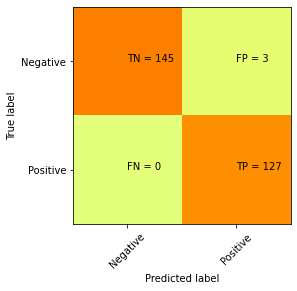

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_df)
print(cm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']

plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### VISUALISING ROC CURVE

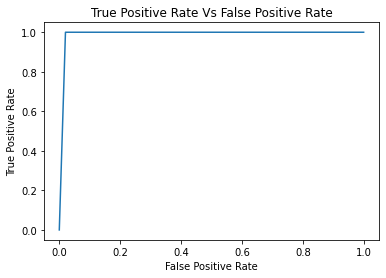

AUC: 0.9898648648648648


In [35]:


from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_df, pos_label=0)
# Print ROC curve
plt.plot(tpr,fpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("True Positive Rate Vs False Positive Rate")
plt.show()


# Print AUC
auc = np.trapz(fpr,tpr)
print('AUC:', auc)